In [16]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random
import xlsxwriter
import matplotlib.pyplot as plt
from numpy.linalg import multi_dot
import pandas as pd 

from numpy.linalg import eig

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
          0         1         2         3         4         5         6   \
0   1.000000 -0.256131  0.671703  0.114777  0.093705 -0.153794 -0.113181   
1  -0.256131  1.000000 -0.552496  0.001918  0.061298 -0.010504  0.076470   
2   0.671703 -0.552496  1.000000  0.143577  0.203823 -0.060978  0.035533   
3   0.114777  0.001918  0.143577  1.000000  0.055610  0.187049  0.203028   
4   0.093705  0.061298  0.203823  0.055610  1.000000  0.005562  0.047400   
5  -0.153794 -0.010504 -0.060978  0.187049  0.005562  1.000000  0.667666   
6  -0.113181  0.076470  0.035533  0.203028  0.047400  0.667666  1.000000   
7   0.668047  0.022026  0.364947  0.355283  0.200632 -0.021946  0.071269   
8  -0.682978  0.234937 -0.541904 -0.085652 -0.265026  0.070377 -0.066495   
9   0.183006 -0.260987  0.312770  0.005527  0.371260  0.0

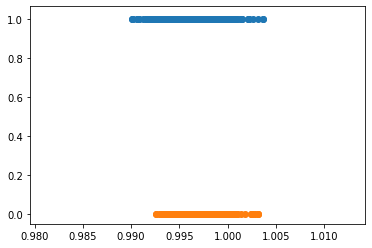

In [27]:
with open('winequality-red.csv', 'r')  as winedata:
    reader = csv.reader(winedata, delimiter=';') #maybe csv from mac? Set the delimiter to ';'
    headers = next(reader)
    print(headers)
    rows= [row for row in reader]
    
    dataset=np.array(rows,dtype=np.float) 
corr=np.corrcoef(dataset, dataset)
#dataset will be used for K-fold validation
#selectiondataset=np.zeros(corr.shape[0],1)
#selectiondataset=corr[0,:]>=80



#index=np.array(dataset[::,11]>5).T
#catdataset = np.append(dataset, np.reshape(index,(index.shape[0],1)), axis = 1)
dataset[:,11]=dataset[:,11]>5
catdataset=dataset
datasetcorr=pd.DataFrame(dataset)
print(datasetcorr.corr())

features_p=catdataset[catdataset[:,11]==1,:]

features_n=catdataset[catdataset[:,11]==0,:]
minimum_p=features_p[np.argmin(features_p, axis=0),:-1]
maximum_p=features_p[np.argmax(features_p, axis=0),:-1]
mean_p=np.mean(features_p, axis=0)
std_p=np.std(features_p, axis=0)
print(minimum_p)
minimum_n=features_p[np.argmin(features_n, axis=0),:-1]
maximum_n=features_p[np.argmax(features_n, axis=0),:-1]
mean_n=np.mean(features_n, axis=0)
std_n=np.std(features_n, axis=0)
print(mean_n)
Centeredfeaturep=features_p-np.ones((features_p.shape[0],1),dtype=float)*mean_p.T
corrc=np.cov((Centeredfeaturep+0.001).T)
values, vectors = eig(corrc)

P = vectors.T.dot(Centeredfeaturep.T)

print(vectors)
print(values)


Centeredfeaturen=features_n-np.ones((features_n.shape[0],1),dtype=float)*mean_n.T
corrcn=np.cov((Centeredfeaturen+0.001).T)
values1, vectors1 = eig(corrcn)

P = vectors.T.dot(Centeredfeaturen.T)

print(vectors1)
print(values1)
#axs=Axes3D(fig)
#for featureindex in range(catdataset.shape[1]-1):
plt.scatter(catdataset[catdataset[:,-1]==1,7],catdataset[catdataset[:,-1]==1,11])
plt.scatter(catdataset[catdataset[:,-1]==0,7],catdataset[catdataset[:,-1]==0,11])


#print(catdataset)


#print(dataset[:,11])


In [ ]:
class logisticgradientdescent:
    learningrate=0;
    iterations=0;
  
    def __init__(self,alphak,k):
        self.learningrate=alphak
        self.iterations=k
    def fit(self,trainingdata):
       
        data=trainingdata
        w=np.zeros(data.shape[1]-1,dtype=np.float)
       
        for i in range(self.iterations):
            for rows in data:
                w=w+self.learningrate*rows[0:-1].dot(rows[-1]-1/(1+math.exp(-rows[0:-1].dot(w))))
              
        return w      
             #
        #Define a fit function, which takes the training data (i.e., X and y)—as well as other hyperparameters (e.g.,
#the learning rate and/or number of gradient descent iterations)—as input. This function should train your
#model by modifying the model parameters.
    def predict(self,testdata,w):
        nvalidationset=testdata.shape[0]
        sigmoi=np.zeros(nvalidationset)
        counter=0
        for rows in testdata:
           
            sigmoi[counter]=((1/(1+math.exp(-rows[0:-1].dot(w))))>=0.5)==rows[-1]
            counter+=1
        return sum(sigmoi)/counter

class LDA:
    def _init(self):
        self.p_p=0
        self.p_n=0
        self.mean_p=[]
        self.mean_n=[]
        self.covariance=[]
    def fit(self,trainingdata):
           
            #self.covariance_p=np.zeros((trainingdata.shape[1]-1,trainingdata.shape[1]-1),dtype=float)
            self.covariance=np.zeros((trainingdata.shape[1]-1,trainingdata.shape[1]-1),dtype=float)
            
            self.mean_p=np.mean(trainingdata[trainingdata[:,-1]==1,0:-1],axis=0)
            self.mean_n=np.mean(trainingdata[trainingdata[:,-1]==0,0:-1],axis=0)
            self.p_p=sum(trainingdata[:,-1]==1)/trainingdata.shape[0]
            self.p_n=sum(trainingdata[:,-1]==0)/trainingdata.shape[0]
            data_p=trainingdata[trainingdata[:,-1]==1,0:-1]
            data_n=trainingdata[trainingdata[:,-1]==0,0:-1]
            counter=0
            meanvector=np.zeros((trainingdata[:,0:-1].shape),dtype='float')
            for index,item in enumerate(trainingdata[:,-1]):
                
                if item==1:
                    meanvector[index,:]=self.mean_p
                elif(item==0):
                     meanvector[index,:]=self.mean_n
                    
           
         
               
            for i,column in enumerate(trainingdata[:,0:-1].T):
                   
                #print(np.dot(np.transpose(column-self.mean_p[counter]),column-self.mean_p[counter]))
                 self.covariance[i,i]=1/(multi_dot([np.transpose(column-meanvector[:,i]),column-meanvector[:,i]]))*(trainingdata.shape[0]-2)
                 
            #for i in range(data_n.shape[1]):
                #print(np.dot(np.transpose(column-self.mean_p[counter]),column-self.mean_p[counter]))
             #   self.covariance_n[i,i]=1/(multi_dot([np.transpose(data_n[:,i]-self.mean_n[i]),data_n[:,i]-self.mean_n[i]]))*(trainingdata.shape[0]-2) 
            self.covariance=np.cov(trainingdata[:,0:-1]) 
           
    def predict(self,testdata):
        counter=0
        label=np.zeros((testdata.shape[0],1),dtype='float')
        for row in testdata:
            
            logoddsratio=math.log(self.p_p/self.p_n)-1/2*multi_dot([np.transpose(self.mean_p),self.covariance,self.mean_p])
            +1/2*multi_dot([np.transpose(self.mean_n),self.covariance,self.mean_n])
            +multi_dot([row,self.covariance,(self.mean_p-self.mean_n)])
           
            if logoddsratio<0:
                
                label[counter]=0
                counter=counter+1
        return label
class modelselection:
    def crossvalidation(self,dataset,fold):
        selection=np.zeros(dataset.shape[0])
   
        validationresult=np.zeros((dataset.shape[1],fold),dtype=float)
        for i in range(0,fold):
            print(np.int(dataset.shape[0]/fold))
            selection[(i+(i)*np.int(dataset.shape[0]/fold)):(np.int(dataset.shape[0]/fold)*(i+1)+i)]=1
            #selection=np.random.randin(1,dataset.shape[0],5)
            validation=dataset[selection==1,:]
            trainingset=dataset[selection==0,:]
            x = logisticgradientdescent(0.001,3000)
            print(validation)
            w=x.fit(dataset)
            print(w)
            performance=x.predict(validation,w)
            print("the logistic model performance", performance)
            #validationresult[0:-1,i] =w
           # validationresult[-1,i]=performance
            z=LDA()
            z.fit(trainingset)
            print("the estimation result is",z.predict(validation[:,0:-1]))
       # model=validationresult[0:-1,np.argmin(validationresult[-1,:])]
        return w

y=modelselection()
print(catdataset.shape[0])
model=y.crossvalidation(catdataset[0:1439,:],5)
targetlabel=np.zeros(catdataset[1440::,:].shape[0],dtype=float)
counter=0
for rows in catdataset[1440::,:]:
    
    targetlabel[counter]=((1/(1+math.exp(-rows[0:-1].dot(model))))>=0.6)==rows[-1]
    counter=counter+1
print(sum(targetlabel/counter))

#This function should take the data points (i.e.,X), true labels (i.e., y), and target labels (i.e., ^y) as input, and it should
#output the accuracy score.



